Instructions for updating:
Use `tf.keras.layers.Conv2D` instead.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Use keras.layers.MaxPooling2D instead.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Instructions for updating:
Use standard file APIs to check for files with this prefix.
INFO:tensorflow:Restoring parameters from model/66000.ckpt


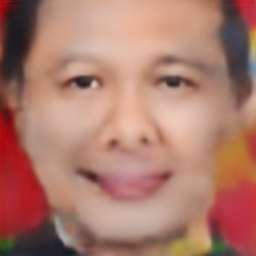

In [2]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'


import tensorflow as tf
import numpy as np
from scipy import misc
from tensorflow.examples.tutorials.mnist import input_data
import random
import math

def weight_variable(shape):
    initial = tf.truncated_normal(shape, stddev=0.1)
    return tf.Variable(initial)

def bias_variable(shape):
    initial = tf.constant(0.1, shape=shape)
    return tf.Variable(initial)

IMAGE_WIDTH = 256
IMAGE_HEIGHT = 256

learning_rate = 0.0002  # Used to be 0.001
inputs_ = tf.placeholder(tf.float32, (None, IMAGE_HEIGHT, IMAGE_WIDTH, 3), name='inputs')
targets_ = tf.placeholder(tf.float32, (None, IMAGE_HEIGHT, IMAGE_WIDTH, 3), name='targets')




### Encoder


convx = tf.layers.conv2d(inputs=inputs_, filters=120, kernel_size=(3,3), padding='same', activation=tf.nn.relu)
# Now 64x64x25
maxpoolx = tf.layers.max_pooling2d(convx, pool_size=(3,3), strides=(2,2), padding='same')
# Now 32x32x25
convy = tf.layers.conv2d(inputs=maxpoolx, filters=160, kernel_size=(3,3), padding='same', activation=tf.nn.relu)
# Now 64x64x25
maxpooly = tf.layers.max_pooling2d(convy, pool_size=(3,3), strides=(2,2), padding='same')
# Now 32x32x25
conv0 = tf.layers.conv2d(inputs=maxpooly, filters=180, kernel_size=(3,3), padding='same', activation=tf.nn.relu)
# Now 64x64x25
maxpool0 = tf.layers.max_pooling2d(conv0, pool_size=(3,3), strides=(2,2), padding='same')
# Now 32x32x25
conv1 = tf.layers.conv2d(inputs=maxpool0, filters=200, kernel_size=(3,3), padding='same', activation=tf.nn.relu)
# Now 32x32x40
maxpool1 = tf.layers.max_pooling2d(conv1, pool_size=(3,3), strides=(2,2), padding='same')
# Now 16x16x40
conv2 = tf.layers.conv2d(inputs=maxpool1, filters=220, kernel_size=(3,3), padding='same', activation=tf.nn.relu)
# Now 16x16x60
maxpool2 = tf.layers.max_pooling2d(conv2, pool_size=(3,3), strides=(2,2), padding='same')
# Now 8x8x60
conv3 = tf.layers.conv2d(inputs=maxpool2, filters=240, kernel_size=(3,3), padding='same', activation=tf.nn.relu)
# Now 8x8x80
maxpool3 = tf.layers.max_pooling2d(conv3, pool_size=(3,3), strides=(2,2), padding='same')
# Now 4x4x80

maxpool3_flat = tf.reshape(maxpool3, [-1,4*4*240])

W_fc1 = weight_variable([4*4*240, 300])
b_fc1 = bias_variable([300])
tesy = tf.matmul(maxpool3_flat, W_fc1)
encoded = tf.nn.relu(tf.matmul(maxpool3_flat, W_fc1) + b_fc1)

W_fc2 = weight_variable([300, 4*4*240])
b_fc2 = bias_variable([4*4*240])
predecoded_flat = tf.nn.relu(tf.matmul(encoded, W_fc2) + b_fc2)

predecoded = tf.reshape(predecoded_flat, [-1,4,4,240])

### Decoder
upsample1 = tf.image.resize_images(predecoded, size=(8,8), method=tf.image.ResizeMethod.NEAREST_NEIGHBOR)
# Now 8x8x80
conv4 = tf.layers.conv2d(inputs=upsample1, filters=200, kernel_size=(3,3), padding='same', activation=tf.nn.relu)
# Now 8x8x60
upsample2 = tf.image.resize_images(conv4, size=(16,16), method=tf.image.ResizeMethod.NEAREST_NEIGHBOR)
# Now 16x16x60
conv5 = tf.layers.conv2d(inputs=upsample2, filters=160, kernel_size=(3,3), padding='same', activation=tf.nn.relu)
# Now 16x16x40
upsample3 = tf.image.resize_images(conv5, size=(32,32), method=tf.image.ResizeMethod.NEAREST_NEIGHBOR)
# Now 32x32x40
conv6 = tf.layers.conv2d(inputs=upsample3, filters=120, kernel_size=(3,3), padding='same', activation=tf.nn.relu)
# Now 32x32x25
upsample4 = tf.image.resize_images(conv6, size=(48,48), method=tf.image.ResizeMethod.NEAREST_NEIGHBOR)
# Now 64x64x25
conv7 = tf.layers.conv2d(inputs=upsample4, filters=100, kernel_size=(3,3), padding='same', activation=tf.nn.relu)
# Now 64x64x10
upsample5 = tf.image.resize_images(conv7, size=(64,64), method=tf.image.ResizeMethod.NEAREST_NEIGHBOR)
# Now 64x64x25
conv8 = tf.layers.conv2d(inputs=upsample5, filters=50, kernel_size=(3,3), padding='same', activation=tf.nn.relu)
# Now 64x64x10
upsample6 = tf.image.resize_images(conv8, size=(96,96), method=tf.image.ResizeMethod.NEAREST_NEIGHBOR)
# Now 64x64x25
conv9 = tf.layers.conv2d(inputs=upsample6, filters=30, kernel_size=(3,3), padding='same', activation=tf.nn.relu)
# Now 64x64x10

upsample7 = tf.image.resize_images(conv9, size=(128,128), method=tf.image.ResizeMethod.NEAREST_NEIGHBOR)
# Now 64x64x25
conv10 = tf.layers.conv2d(inputs=upsample7, filters=20, kernel_size=(3,3), padding='same', activation=tf.nn.relu)
# Now 64x64x10
upsample8 = tf.image.resize_images(conv10, size=(192,192), method=tf.image.ResizeMethod.NEAREST_NEIGHBOR)
# Now 64x64x25
conv11 = tf.layers.conv2d(inputs=upsample8, filters=15, kernel_size=(3,3), padding='same', activation=tf.nn.relu)
# Now 64x64x10
upsample9 = tf.image.resize_images(conv11, size=(256,256), method=tf.image.ResizeMethod.NEAREST_NEIGHBOR)
# Now 64x64x25
conv12 = tf.layers.conv2d(inputs=upsample9, filters=15, kernel_size=(3,3), padding='same', activation=tf.nn.relu)
# Now 64x64x10

logits = tf.layers.conv2d(inputs=conv12, filters=3, kernel_size=(3,3), padding='same', activation=None)
#Now 64x64x1

# Pass logits through sigmoid to get reconstructed image
decoded = tf.nn.sigmoid(logits)

# Pass logits through sigmoid and calculate the cross-entropy loss
loss = tf.nn.sigmoid_cross_entropy_with_logits(labels=targets_, logits=logits)

# Get cost and define the optimizer
cost = tf.reduce_mean(loss)
opt = tf.train.AdamOptimizer(learning_rate).minimize(cost)

import cv2
from PIL import Image
sess = tf.Session()

saver = tf.train.Saver()
sess.run(tf.global_variables_initializer())
#saver.restore(sess, "model/66000.ckpt")
saver.restore(sess,  "model/66000.ckpt")

real_settings = np.random.uniform(-0.5, 1, size=[1, 300]).astype(np.float32)
reconstructed_image = sess.run([decoded], feed_dict={encoded: real_settings})
ri_np = np.array(reconstructed_image).reshape((256, 256, 3))
#ri_np = np.swapaxes(ri_np, 0, 1)
ri_np = ri_np * 255
ri_np = ri_np[0:256,0:256,:]


#https://stackoverflow.com/questions/34727431/tensorflow-on-jupyter-cant-restore-variables
#kadang ngga bisa di restore ketika pindah notebook
#jadi harus direset tiap run
saver = tf.reset_default_graph()

cv2.imwrite('slid.jpg', ri_np)
Image.open('slid.jpg')


In [3]:
import tensorflow as tf
tf.version

<module 'tensorflow._api.v1.version' from 'D:\\ANACONDA3B\\lib\\site-packages\\tensorflow\\_api\\v1\\version\\__init__.py'>

In [4]:
import operator
eigenvalues = np.load("eigenvalues.npy")
eigenvectors = np.load("eigenvectors.npy")
denseData = np.load("denseArray27K.npy")
eigenvectorInverses = np.linalg.pinv(eigenvectors)
denseMean = denseData.mean(axis=0)
meandata = np.random.uniform(0, 0, size=[1, 300]).astype(np.float32)
for i in range(300):
    meandata[0][i] = denseMean[i]

    
index, value = max(enumerate(eigenvalues), key=operator.itemgetter(1))
import matplotlib.pyplot as plt
def draw_plot(d, tittle='text here'):
  
  plt.plot(d,'r-',label='Eigenvalue')
  plt.legend()
  #plt.suptitle('epochs:'+tittle, fontsize=14)
  plt.show()

draw_plot(eigenvalues)
print(meandata.shape)

<Figure size 640x480 with 1 Axes>

(1, 300)


In [6]:
import pygame, math, sys
pygame.init()

X = 900  # screen width
Y = 600  # screen height

WHITE = (255, 255, 255)
BLACK = (0, 0, 0)
RED = (255, 50, 50)
YELLOW = (255, 255, 0)
GREEN = (0, 255, 50)
BLUE = (50, 50, 255)
GREY = (200, 200, 200)
ORANGE = (200, 100, 50)
CYAN = (0, 255, 255)
MAGENTA = (255, 0, 255)
TRANS = (1, 1, 1)

flow = False  # controls type of color flow


class Button():
    def __init__(self, index, txt, location, bg=WHITE, fg=BLACK, size=(80, 30), font_name="Segoe Print", font_size=16):
        self.color = bg  # the static (normal) color
        self.bg = bg  # actual background color, can change on mouseover
        self.fg = fg  # text color
        self.size = size
        self.index = index
        self.font = pygame.font.SysFont(font_name, font_size)
        self.txt = txt
        self.txt_surf = self.font.render(self.txt, 1, self.fg)
        self.txt_rect = self.txt_surf.get_rect(center=[s//2 for s in self.size])

        self.surface = pygame.surface.Surface(size)
        self.rect = self.surface.get_rect(center=location)

       

    def draw(self):
        self.mouseover()

        self.surface.fill(self.bg)
        self.surface.blit(self.txt_surf, self.txt_rect)
        screen.blit(self.surface, self.rect)

    def mouseover(self):
        self.bg = self.color
        pos = pygame.mouse.get_pos()
        if self.rect.collidepoint(pos):
            self.bg = GREY  # mouseover color

        
def random_DPR(slide_val):
    print('1')
    return np.random.uniform(-1, 1, size=[1, 300]).astype(np.float32)

def invert_DPR(val):
    print('2')
    return val*-1


def mousebuttondown(slide_val):
    pos = pygame.mouse.get_pos()
    for button in buttons:
        if button.rect.collidepoint(pos):
            if button.index == 1 :
                random_DPR(slide_val)
            if button.index == 2 :
                invert_DPR(slide_val)
            return True
    return False
        
class Slider():
    def __init__(self, name, val, maxi, mini, posx, posy=20):
        self.val = val  # start value
        self.maxi = maxi  # maximum at slider position right
        self.mini = mini  # minimum at slider position left
        self.xpos = posx  # x-location on screen
        self.ypos = posy
        self.surf = pygame.surface.Surface((90, 25))
        self.hit = False  # the hit attribute indicates slider movement due to mouse interaction

        self.txt_surf = font.render(name, 1, BLACK)
        self.txt_rect = self.txt_surf.get_rect(center=(50, 5))

        # Static graphics - slider background #
        self.surf.fill((100, 100, 100))
        #pygame.draw.rect(self.surf, GREY, [0, 0, 100, 50], 3)
        pygame.draw.rect(self.surf, ORANGE, [5, 0, 80, 10], 0)
        pygame.draw.rect(self.surf, WHITE, [5, 15, 80, 5], 0)

        self.surf.blit(self.txt_surf, self.txt_rect)  # this surface never changes

        # dynamic graphics - button surface #
        self.button_surf = pygame.surface.Surface((20, 20))
        self.button_surf.fill(TRANS)
        self.button_surf.set_colorkey(TRANS)
        pygame.draw.circle(self.button_surf, BLACK, (5, 10), 6, 0)
        pygame.draw.circle(self.button_surf, ORANGE, (5, 10), 4, 0)

    def draw(self):
        """ Combination of static and dynamic graphics in a copy of
    the basic slide surface
    """
        # static
        surf = self.surf.copy()

        # dynamic
        pos = (10+int((self.val-self.mini)/(self.maxi-self.mini)*80), 17)
        self.button_rect = self.button_surf.get_rect(center=pos)
        surf.blit(self.button_surf, self.button_rect)
        self.button_rect.move_ip(self.xpos, self.ypos)  # move of button box to correct screen position

        # screen
        screen.blit(surf, (self.xpos, self.ypos))

    def move(self):
        """
    The dynamic part; reacts to movement of the slider button.
    """
        self.val = (pygame.mouse.get_pos()[0] - self.xpos - 10) / 80 * (self.maxi - self.mini) + self.mini
        if self.val < self.mini:
            self.val = self.mini
        if self.val > self.maxi:
            self.val = self.maxi


def update_slide_val(slide_val,slides):
    slide_val =meandata.copy()
    
    for x in range(100):
        #slide_val[0].append(slides[x].val)
        #slide_val[0] = np.append(slide_val[0],slides[x].val)
        slide_val += slides[x].val*eigenvalues[x]*eigenvectors[x]
    return slide_val
def draw_DPR(slide_val,screen):
    #real_settings = np.random.uniform(-0.5, 1, size=[1, 300]).astype(np.float32)
    reconstructed_image = sess.run([decoded], feed_dict={encoded: slide_val})
    ri_np = np.array(reconstructed_image).reshape((256, 256, 3))
    #ri_np = np.swapaxes(ri_np, 0, 1)
    ri_np = ri_np * 255

    saver = tf.reset_default_graph()

    cv2.imwrite('slid.jpg', ri_np)
        
    
    img = pygame.image.load('slid.jpg')
    screen.blit(img, (650, 50))
    
def crop_images(image, size):
    image = inverse_transform(image)
    image = np.squeeze(merge(image, size))*255
    image = image[0:128,0:128,:]
    cv2.imwrite('slid.jpg', image)

font = pygame.font.SysFont("Verdana", 12)
screen = pygame.display.set_mode((X, Y))
clock = pygame.time.Clock()

COLORS = [MAGENTA, RED, YELLOW, GREEN, CYAN, BLUE]
#xcolor = Gradient(COLORS, X).gradient

slide_val = np.zeros((1,100))
slides = []
posx=0
posy=5
for x in range(100):
    slides.append(Slider("Noise"+str(x+1),0,1,-1,posx,posy))
    posx=posx+95
    if len(slides) % 5 == 0:
        posy = posy+30
        posx=0       
slide_val =update_slide_val(slide_val,slides)

button_01 = Button(1, "Random!", (765, 350))
button_02 = Button(2, "Invert!", (765, 400), bg=(50, 200, 20))
buttons = [button_01, button_02]


#slides = [pen,pen,pen,jmp,jmp, freq, jmp, size, focus, phase, speed,speed,speed]

num = 0

while True:
    for event in pygame.event.get():
        if event.type == pygame.QUIT:
            pygame.quit()
            sys.exit()
        elif event.type == pygame.MOUSEBUTTONDOWN:
            pos = pygame.mouse.get_pos()
            slide_val =update_slide_val(slide_val,slides)
            for button in buttons:
                if button.rect.collidepoint(pos):
                    if button.index == 1 :
                        slide_val = random_DPR(slide_val)
                        for x in range(100):
                            slides[x].val = slide_val[0][x]
                    if button.index == 2 :
                        for x in range(100):
                            slides[x].val = invert_DPR(slides[x].val)
            for s in slides:
                if s.button_rect.collidepoint(pos):
                    s.hit = True
                    update_gambar = True
                    print('njir')
        elif event.type == pygame.MOUSEBUTTONUP:
            for s in slides:
                s.hit = False

    # Move slides
    for s in slides:
        if s.hit:
            s.move()

    # Update screen
    screen.fill(BLACK)
    #num += 2
    #wave(num)

    for s in slides:
        s.draw()
    for button in buttons:
        button.draw()
        
    slide_val =update_slide_val(slide_val,slides)
    draw_DPR(slide_val,screen)

    pygame.display.flip()
    clock.tick(50)

1
1


KeyboardInterrupt: 